In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import MultiTaskLasso, Lasso

In [6]:

rng = np.random.RandomState(42)
# Generate some 2D coefficients with sine waves with random frequency and phase

n_samples, n_features, n_tasks = 100, 30, 40

n_relevant_features = 5

coef = np.zeros((n_tasks, n_features))
# coef.shape # (40, 30)
coef

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

In [20]:
# pd.DataFrame(coef)
X = rng.randn(n_samples, n_features)  # (100, 30)  
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)   # (100, 30) * (30, 40) + (100, 40)
# Y.shape (100, 40)   

(100, 40)

In [26]:
coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
print(coef_lasso_.shape)
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_
coef_multi_task_lasso_
print(coef_multi_task_lasso_.shape)

(40, 30)
(40, 30)


In [28]:
# print(Y.T.shape)
# for y in Y.T:
#     print(y.shape)

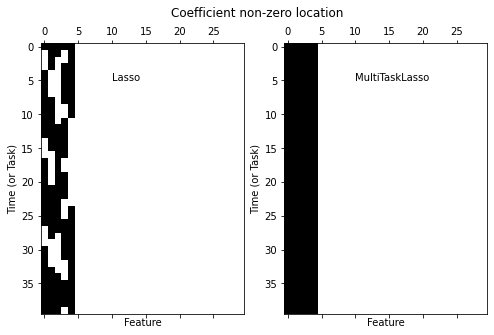

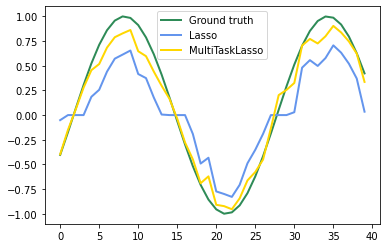

In [29]:
# #############################################################################
# Plot support and time series
fig = plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")
plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="Ground truth")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()